In [11]:
import pandas as pd
from scipy.io import arff
from sklearn import preprocessing
import numpy as np
import sys
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools

In [12]:
def load_data(path):
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    le_list = ['DGN', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE14', 
               'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']
    for item in le_list:
        le = preprocessing.LabelEncoder()
        df[item] = le.fit_transform(df[item])
    scaler = preprocessing.MinMaxScaler()
    data = scaler.fit_transform(df)
    predictors = data[:,:-1]
    responses = data[:,-1]
    return predictors, responses

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [13]:
predictors, responses = load_data("ThoraricSurgery.arff")
x_train, x_test, y_train, y_test = train_test_split(predictors, responses, test_size=0.25)

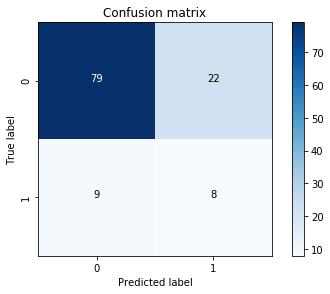

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.01, 100]}
LR = LogisticRegression(class_weight='balanced')
clf = GridSearchCV(LR, parameters)
clf.fit(x_train,y_train)
predictions_test = clf.predict(x_test)
cnm_test = confusion_matrix(y_test,predictions_test)
plot_confusion_matrix(cnm_test, classes=[0,1], title='Confusion matrix', cmap=plt.cm.Blues)